## Case Study| Machine Learning Engineer V1.0

The goal of this notebook is to process and anakyze the data,build an ML model,train it,test it and fine tune it.

## Importing Libraries

In [1]:
# Importing Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Data Preprocessing
We will check for missing data,data type,data distribution and apply necessary cleaning steps

In [2]:
#Importing data
train_set=pd.read_csv('train_data.csv',index_col=[0])

In [3]:
# Checking data,if it was loaded
train_set.head()

,temperature,demand
0,37.212162,164.733179
1,40.679730,689.095128
2,43.404054,682.134571
3,24.763514,703.016241
4,26.962162,686.774942


In [4]:
# getting some info of our data
print(train_set.describe())
print(train_set.dtypes)
print(train_set.isnull())

       temperature       demand
count   260.000000   260.000000
mean     51.353935   768.367678
std      15.242134   126.565154
min      12.260811   161.252900
25%      39.035811   699.342614
50%      53.155405   804.524362
75%      64.799324   849.284609
max      76.514865  1000.000000
temperature    float64
demand         float64
dtype: object
     temperature  demand
0          False   False
1          False   False
2          False   False
3          False   False
4          False   False
..           ...     ...
255        False   False
256        False   False
257        False   False
258        False   False
259        False   False

[260 rows x 2 columns]


array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'demand'}>]], dtype=object)

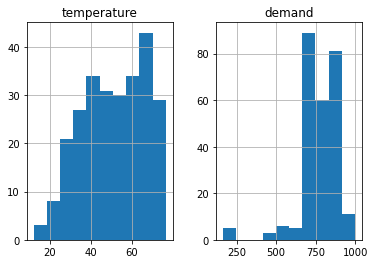

In [5]:
# Data distribution
train_set.hist()

<AxesSubplot:xlabel='temperature', ylabel='demand'>

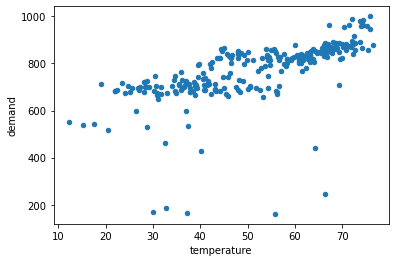

In [6]:
# Scatter plot visualization
train_set.plot.scatter(x='temperature',y='demand')

<AxesSubplot:>

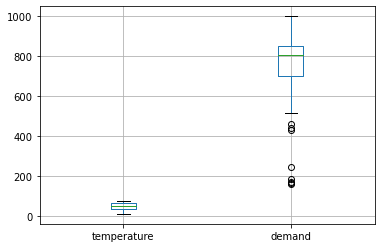

In [7]:
# Visualizing training data for outlier
train_set.boxplot()

array([[<AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='demand', ylabel='temperature'>],
       [<AxesSubplot:xlabel='temperature', ylabel='demand'>,
        <AxesSubplot:xlabel='demand', ylabel='demand'>]], dtype=object)

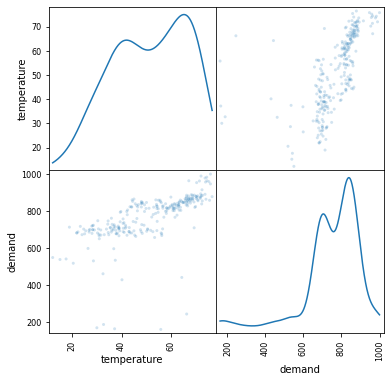

In [8]:
#Exploring feature relationship
from pandas.plotting import scatter_matrix
scatter_matrix(train_set, alpha=0.2, figsize=(6, 6), diagonal='kde')

### Handling Outliers

In [9]:
#We use the Turkey rule to detect outlier
Q1=train_set['demand'].quantile(0.25)
Q3=train_set['demand'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
# using the above condition to drop outliers
train_set_filtered=train_set[train_set['demand'] >= lower_lim]

<AxesSubplot:>

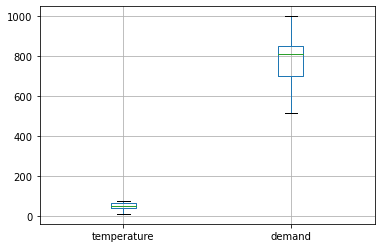

In [10]:
### Checking out our filtred data set
train_set_filtered.boxplot()

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'demand'}>]], dtype=object)

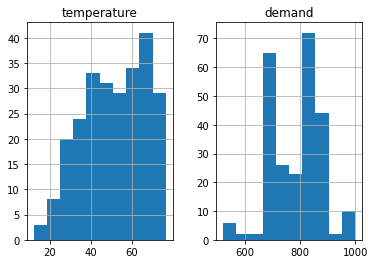

In [11]:
train_set_filtered.hist()

<AxesSubplot:xlabel='temperature', ylabel='demand'>

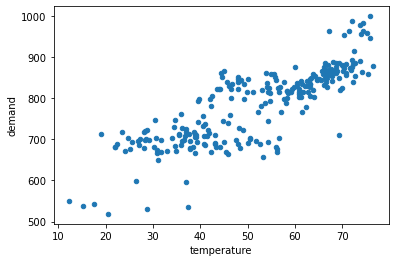

In [12]:
train_set_filtered.plot.scatter(x='temperature',y='demand')

In [13]:
# Processing our data set
# Seperating features from targets variables[x is the feature and y is the dependent variable(target)]
X=train_set_filtered.iloc[:,:-1].values
y=train_set_filtered.iloc[:,1:2].values
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)

### Regression Model

In [14]:
#Simple Linear Regression model
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression()

Coefficients: 
 [[4.96100782]]
Mean squared error: 2570.06
Coefficient of determination: 0.65


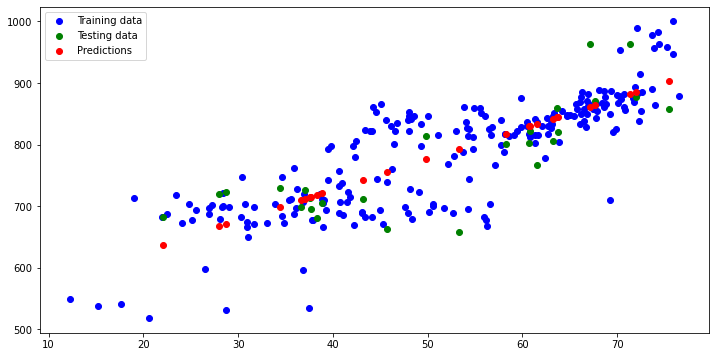

In [15]:
#Prediction
y_pred = regr.predict(x_test)
y_pred = regr.predict(x_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
def plot_preds(traindata = x_train,
               trainlabels = y_train,
               testdata =x_test,
               testlabels = y_test,
               predictions =y_pred):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()
plot_preds(traindata =x_train,

           trainlabels = y_train,

           testdata = x_test,

           testlabels = y_test,

           predictions = y_pred)


In [16]:
# Support Vector Machine
# Create linear regression object
regr = svm.SVR(kernel='linear')
# Train the model using the training sets
regr.fit(x_train, y_train)

C:\Users\gjera\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [17]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" %  mean_squared_error(y_test, y_pred,squared=False,))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))



Coefficients: 
 [[4.71701327]]
Mean squared error: 50.64
Coefficient of determination: 0.65


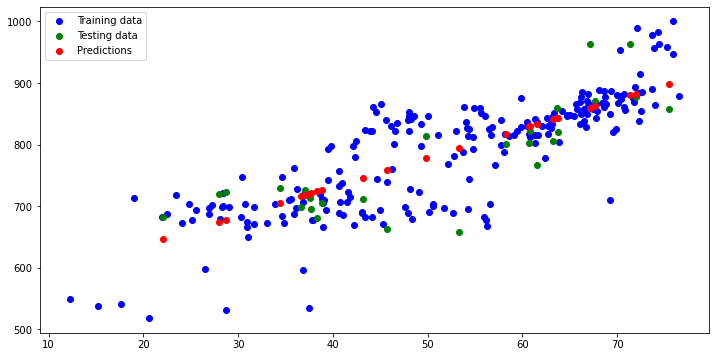

In [18]:
#Plotting the result
def plot_preds(traindata = x_train,
               trainlabels = y_train,
               testdata =x_test,
               testlabels = y_test,
               predictions =y_pred):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()
plot_preds(traindata =x_train,

           trainlabels = y_train,

           testdata = x_test,

           testlabels = y_test,

           predictions = y_pred)

In [19]:
#define the linear regression estimator
#first we set random seed
tf.random.set_seed(42)
model= tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model.fit(x_train, y_train, epochs=500, verbose=0)

Mean squared error: 66.62
Coefficient of determination: 0.40


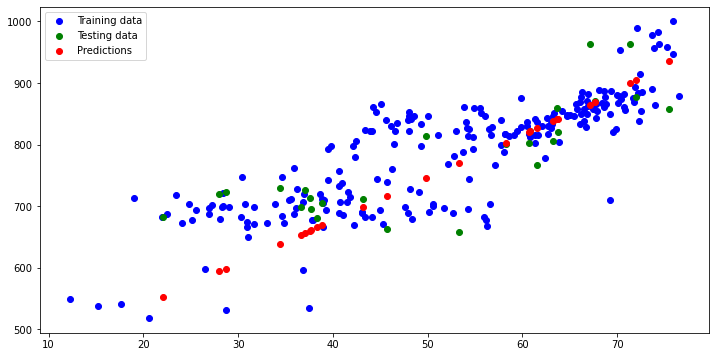

In [20]:
y_pred=model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f" %  mean_squared_error(y_test, y_pred,squared=False,))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

def plot_preds(traindata = x_train,
               trainlabels = y_train,
               testdata =x_test,
               testlabels = y_test,
               predictions =y_pred):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()
plot_preds(traindata =x_train,

           trainlabels = y_train,

           testdata = x_test,

           testlabels = y_test,

           predictions = y_pred)